In [1]:
import sys 
sys.path.append('..')
from qiskit import IBMQ
#### IBMQ(https://quantum-computing.ibm.com/) account might be necessary 
# please type your account 
#IBMQ.save_account('account')

In [2]:
# math tools
import numpy as np 
from scipy import stats 
import os
import copy
# class
from argparse import Namespace

# neural net 
import torch 
import torch.nn as nn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from neural.net import VonNeumannEP, train, validate

# iteration
from tqdm.notebook import tqdm


## xxzchain 
from xxzchain.xxzchain import groundXXZ, entangleandvislist, xxzansatz

# quantum circuit 
from qiskit import Aer
backend = Aer.get_backend("aer_simulator") # set simulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.algorithms.optimizers import COBYLA, ADAM, SLSQP, SPSA, GradientDescent
from qiskit.quantum_info import random_statevector, random_density_matrix, Statevector
from qiskit.circuit.library import EfficientSU2
## custom lib 
from cirquit.tools import data_processing, initial_entangle_EP
from cirquit.CircuitModelMk4 import HybridCircuit

#from qiskit import tools
from qiskit import quantum_info
import qutip as qt

# graph tool 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# date for mkdir 
from datetime import date

import time

In [3]:
import pickle
def save_obj(obj, name ):
    """
    inputs
    obj 
    name string
    """
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
#four qubits 
fourqubitsdetailqubit8arxiv005mag =[0.0, 0.15, 0.3, 0.31, 0.3422222222222222, 0.37444444444444447, 0.4066666666666667, 0.4388888888888889, 0.4711111111111111, 0.5033333333333333, 0.5355555555555556, 0.5677777777777777, 0.6, 0.61, 0.8049999999999999, 1.0, 1.01, 1.0533333333333332, 1.0966666666666667, 1.14, 1.1833333333333333, 1.2266666666666666, 1.27, 1.3133333333333332, 1.3566666666666665, 1.4, 1.41, 1.4633333333333332, 1.5166666666666666, 1.5699999999999998, 1.6233333333333333, 1.6766666666666665, 1.73, 1.7833333333333332, 1.8366666666666664, 1.89, 1.9, 1.9666666666666666, 2.033333333333333, 2.1, 2.1666666666666665, 2.2333333333333334, 2.3, 2.3666666666666667, 2.4333333333333336, 2.5, 2.51, 3.0]
fourqubitdetailqubit8arxiv005exact = [1.043790514061075, 1.0437905140610766, 1.0437905140610764, 1.0437905140610764, 1.0437905140610753, 1.0437905140610757, 1.043790514061077, 1.016657819066816, 1.0166578190668167, 1.0166578190668174, 1.016657819066816, 1.0166578190668158, 1.0166578190668158, 1.016657819066818, 1.0166578190668156, 1.016657819066816, 1.016657819066817, 1.0166578190668163, 1.016657819066816, 1.0166578190668156, 1.0166578190668165, 0.9223824387186915, 0.9223824387186904, 0.9223824387186921, 0.9223824387186907, 0.9223824387186891, 0.922382438718689, 0.9223824387186901, 0.9223824387186903, 0.9223824387186907, 0.9223824387186903, 0.9223824387186875, 0.9223824387186892, 0.9223824387186901, 0.6931471805599457, 0.6931471805599466, 0.6931471805599463, 0.6931471805599453, 0.6931471805599456, 0.6931471805599454, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:
from os import walk


# four qubits! 
mypathlist = ['../notebooks/data/arXiv/QNEE4qubits/XXZmu0.0delta0.05threemk4_NQ4_s0_reps10',
              '../notebooks/data/arXiv/QNEE4qubits/XXZmu0.5delta0.05threemk4_NQ4_s0_reps10',
              '../notebooks/data/arXiv/QNEE4qubits/XXZmu1.0delta0.05threemk4_NQ4_s0_reps10',
              '../notebooks/data/arXiv/QNEE4qubits/XXZmu1.5delta0.05threemk4_NQ4_s0_reps10',
              '../notebooks/data/arXiv/QNEE4qubits/XXZmu2.0delta0.05threemk4_NQ4_s0_reps10',
              '../notebooks/data/arXiv/QNEE4qubits/XXZmu2.5delta0.05threemk4_NQ4_s0_reps10',
              '../notebooks/data/arXiv/QNEE4qubits/XXZmu3.0delta0.05threemk4_NQ4_s0_reps10'
             ]

maglistQNEE = []
min_EPlist = []
mean_EPlist = []
std_EPlist = []
exact_EPlist = []
exact_eigenlist = []
QNEEP_low_eigen_list = []
for mypath in mypathlist:
    print(mypath)
    fnames = []
    for (dirpath, dirnames, filenames) in walk(mypath):
        fnames.extend(filenames)
        break
    temparray = []
    exactanswer = []
    temp_eigen = [] 
    for i in fnames:
        temp_name = mypath + '/' + i[:-4]
        file_obj = load_obj(temp_name)
        file_obj.inter_ent_list.insert(0,file_obj.ini_loss_list[-1])
        lowEP = np.array(file_obj.inter_ent_list).min()
        temparray.append(lowEP)
        exactanswer.append(file_obj.entangle_EP)
    for i in fnames:
        temp_name = mypath + '/' + i[:-4]
        file_obj = load_obj(temp_name)
        file_obj.inter_ent_list.insert(0,file_obj.ini_loss_list[-1])
        file_obj.inter_eigenvals_list.insert(0,file_obj.ini_eigenval)
        low_idx = np.where( np.array(file_obj.inter_ent_list) == np.array(file_obj.inter_ent_list).min())[0][0]
        low_eigenvalues = file_obj.inter_eigenvals_list[low_idx]
        temp_eigen.append(low_eigenvalues)

    
    maglistQNEE.append(file_obj.mag)
    min_EPlist.append(np.array(temparray).min())
    mean_EPlist.append(np.array(temparray).mean())
    exact_EPlist.append(file_obj.entangle_EP)
    exact_eigenlist.append(file_obj.eigenvalues) #? 
    std_EPlist.append(np.array(temparray).std())
    low_idx = np.where( np.array(temparray) == np.array(temparray).min())[0][0]
    QNEEP_low_eigen_list.append(temp_eigen[low_idx])


../notebooks/data/arXiv/QNEE4qubits/XXZmu0.0delta0.05threemk4_NQ4_s0_reps10
../notebooks/data/arXiv/QNEE4qubits/XXZmu0.5delta0.05threemk4_NQ4_s0_reps10
../notebooks/data/arXiv/QNEE4qubits/XXZmu1.0delta0.05threemk4_NQ4_s0_reps10
../notebooks/data/arXiv/QNEE4qubits/XXZmu1.5delta0.05threemk4_NQ4_s0_reps10
../notebooks/data/arXiv/QNEE4qubits/XXZmu2.0delta0.05threemk4_NQ4_s0_reps10
../notebooks/data/arXiv/QNEE4qubits/XXZmu2.5delta0.05threemk4_NQ4_s0_reps10
../notebooks/data/arXiv/QNEE4qubits/XXZmu3.0delta0.05threemk4_NQ4_s0_reps10


In [6]:
maglist = []
#QNEEP_EPlist = []
VQSE_EPlist = []
exactEPlist =[]

#QNEEP_EPmeanlist = []
VQSE_EPmeanlist = []


VQSE_EPstdlist = []
low_eigen_list = []
exact_eigenlist =[]

for idx, magfield in enumerate([0.0,0.5,1.0,1.5,2.0,2.5,3.0]):
    test = load_obj('../notebooks/data/arXiv/VQSE4qubits/Finite_VQSE_{}qubits_XXZdelta{}mag{}trial{}qlr{}'.format(
                         4, 0.05, magfield, 5, 0.05 ))
    # unpack QNEEP data 
    reduced_state = quantum_info.partial_trace(test.ini_state,
                                               list(np.arange(test.n_qubit,test.num_ini_qubit) )
                                               )
    EP2 = quantum_info.entropy(reduced_state, base = np.e) 
    exact_eigenlist.append(test.eigenvalue_list )
    Elist = []
    EPlist = []
    Eigenlist = []
    for i in test.VQSE_trial_list:
        Elist.append(i[0])
        #print(i[0])
        EPlist.append(i[-1])
        Eigenlist.append(i[2])
    Elist = np.array(Elist)
    VQmean = np.array(EPlist).mean()
    VQstd = np.array(EPlist).std()
    
    smallEidx = np.where(Elist == Elist.min() )
    E,exact_learning_curve,largeproplist,_, VQSEEP = test.VQSE_trial_list[smallEidx[0].squeeze()]
    print('exact EP', EP2)
    print('EP estimated by VQSEEP',VQSEEP)
    
   
    #print(test.VQSE_trial_list)
    maglist.append(test.mag)
    VQSE_EPlist.append(VQSEEP)
    exactEPlist.append(EP2)
    VQSE_EPmeanlist.append(VQmean)
    low_eigen_list.append(largeproplist)

    VQSE_EPstdlist.append(VQstd)
    # unpack VQSE data 

exact EP 1.043790514061075
EP estimated by VQSEEP 1.358523631910793
exact EP 1.0166578190668156
EP estimated by VQSEEP 1.2955634628860055
exact EP 1.016657819066816
EP estimated by VQSEEP 1.5164650776416477
exact EP 0.922382438718691
EP estimated by VQSEEP 1.2116912593447473
exact EP 0.6931471805599454
EP estimated by VQSEEP 1.0558470155521136
exact EP 0.0
EP estimated by VQSEEP 0.0007539279551046724
exact EP 0.0
EP estimated by VQSEEP 0.0024826573555730824


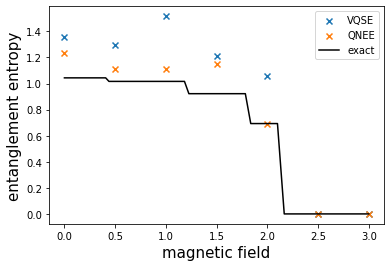

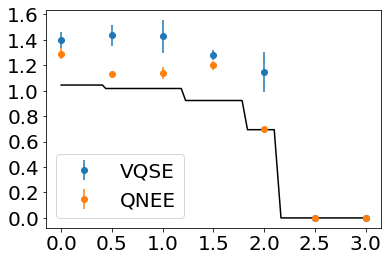

In [7]:

plt.scatter(maglist,VQSE_EPlist, label=r'VQSE',marker='x')
plt.scatter(maglistQNEE, min_EPlist, label =r'QNEE',marker='x')
plt.plot(fourqubitsdetailqubit8arxiv005mag ,fourqubitdetailqubit8arxiv005exact , label =r'exact',color='k')
plt.ylabel(r'entanglement entropy',size = 15)
plt.xlabel(r'magnetic field',size = 15)
plt.legend()

plt.show()



plt.errorbar(maglist, VQSE_EPmeanlist, yerr=VQSE_EPstdlist,fmt='o', label = r'VQSE')
plt.errorbar(maglistQNEE, mean_EPlist, yerr = std_EPlist, label =r'QNEE',fmt='o')
plt.plot(fourqubitsdetailqubit8arxiv005mag ,fourqubitdetailqubit8arxiv005exact ,color='k')#, label =r'exact'
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize='20')


plt.show()

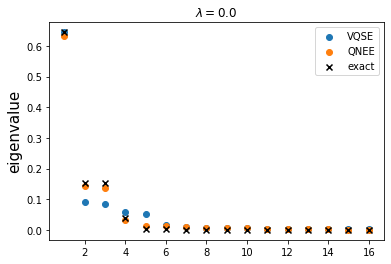

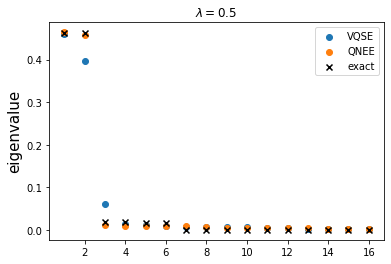

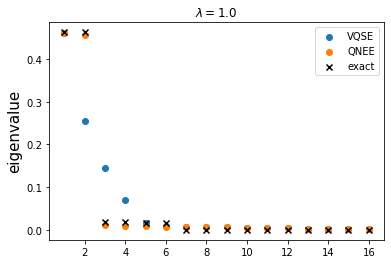

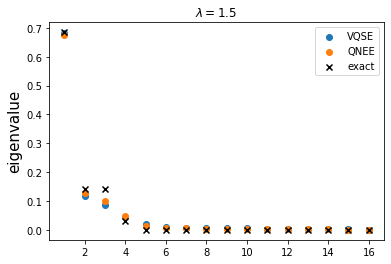

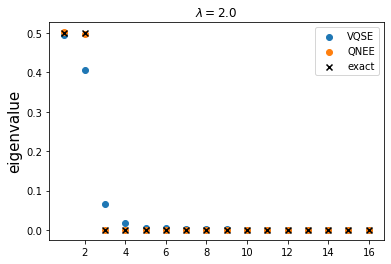

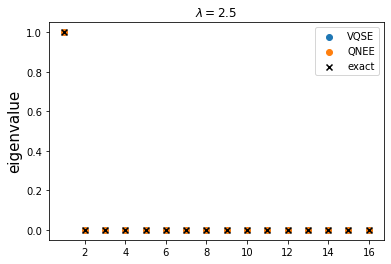

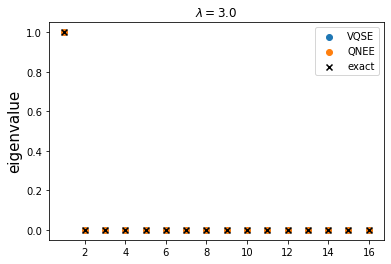

In [9]:
# Eigenvalues are computed based on counting method. 
# Instead you can use outputs of the NN, which is save in the loaded pkl files.

for idx, cont in enumerate(QNEEP_low_eigen_list):

    ent = 0
    for i in cont:
        ent+= -i*np.log(i)
    plt.title(r'$\lambda=$'+str(maglist[idx]))
    plt.ylabel(r'eigenvalue',size = 15)
    VQSE_cont = low_eigen_list[idx]
    if len(VQSE_cont) != 16:
        VQSE_cont = np.append(VQSE_cont, np.zeros(16-len(VQSE_cont)) )
    if len(cont) != 16:
        cont = np.append(cont, np.zeros(16-len(cont)) )
    plt.scatter(np.arange(len(VQSE_cont))+1, VQSE_cont, label =r'VQSE')
    plt.scatter(np.arange(len(cont))+1, cont, label =r'QNEE')
    plt.scatter(np.arange(len(exact_eigenlist[idx]))+1, exact_eigenlist[idx],marker='x',c='k', label =r'exact')
    #plt.xlim(0.5,8.5)
    plt.legend()
    plt.show()